In [1]:
## Import warnings. 
import warnings ## Ignore General warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
## Import analysis modules from sklearn pacakge
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc


C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
## Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [18]:
data_set_  = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
data_set_.info()
# Missing Value encountred in Age, Embarked and Cabin Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
data_set_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data_set_.Cabin.fillna(method='bfill',inplace=True) # Filling the Missing Values with Back fill method
data_set_.Cabin.value_counts().head() 


C78            33
D33            25
B96 B98        24
C23 C25 C27    21
E33            20
Name: Cabin, dtype: int64

In [33]:
data_set_.Age.fillna(data_set_.Age.mean(),inplace=True) # Filling the Age Column with Mean of Age of All passengers
data_set_.Age = data_set_.Age.apply(lambda x: round(x, 0))
data_set_.Age.value_counts().head()

30.0    204
24.0     32
22.0     27
28.0     27
18.0     26
Name: Age, dtype: int64

In [34]:
data_set_.Embarked.fillna(method='bfill',inplace=True) # Filling the Missing Values with Back fill method
data_set_.Embarked.value_counts().head()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

In [35]:
data_set_.isnull().sum() # Checking the missing Values (Hence : No Missing Information in the current dataset)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [36]:
# As Question Suggested in we need to drop these columns
data_set_ = data_set_.drop(['PassengerId','Ticket','Cabin',"Name"], axis=1)

In [37]:
data_set_.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
## Scikit learn estimators require numeric features
sex = {'female':0,'male':1}
embarked = {'C':0,'Q':1,'S':2}
data_set_.Sex = data_set_.Sex.map(sex)
data_set_.Embarked =data_set_.Embarked.map(embarked)
data_set_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [39]:
Target_Value = data_set_.Survived
Target_Value.head() # I assumed Zero not Survived and 1 Is Survived

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
Features_ = data_set_.drop("Survived",axis=1)
Features_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [56]:
## Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(Features_,Target_Value,test_size=.20,random_state=1)

In [57]:
## Take a look at the shape
x_train.shape,y_train.shape

((712, 7), (712,))

In [58]:
x_test.shape

(179, 7)

In [59]:
# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

In [60]:
## Run 10 fold cross validation
cvs = cross_val_score(clf,Features_.values,Target_Value.values,cv=10)
print(cvs)

[0.73333333 0.76666667 0.74157303 0.79775281 0.79775281 0.7752809
 0.82022472 0.70786517 0.84269663 0.80681818]


In [61]:
## Show cross validation score mean and std
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))

Accuracy: 0.7790 (+/- 0.0799)


In [62]:
## Fit the model with data
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [63]:
## Accuracy
acc_decision_tree = round(clf.score(x_train, y_train), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

Accuracy: 0.9860


In [64]:
## Predict y given validation set
predictions = clf.predict(x_test)

In [65]:
## Take a look at the confusion matrix ([TN,FN],[FP,TP])
confusion_matrix(y_test,predictions)

array([[88, 18],
       [27, 46]], dtype=int64)

In [66]:

## Precision
print("Precision: %0.4f" % precision_score(y_test, predictions))

Precision: 0.7188


In [67]:
## Recall score
print("Recall: %0.4f" % recall_score(y_test, predictions))

Recall: 0.6301


In [68]:

## Print classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.77      0.83      0.80       106
          1       0.72      0.63      0.67        73

avg / total       0.75      0.75      0.75       179



In [69]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, predictions)
roc_auc = auc(fp, tp)

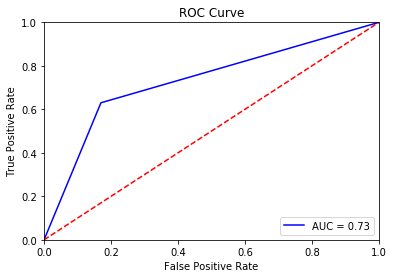

In [70]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()